In [1]:
import os
import torch
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from itertools import product
import json
from collections import defaultdict

from torch import nn
from torch.autograd import Variable
from torch.functional import F
from torchvision import models
import torchvision
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np

# from fastai import transforms, model, dataset, conv_learner

from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from augmentation import SSDAugmentation

from Config import Config
from SSD_model import get_SSD_model, lr_find
from VOC_data import VOC_dataset
from SSDloss import *

torch.set_printoptions(precision=3)

In [2]:
def detection_collate_fn(batch):
    imgs, bboxes, labels = [], [], []
    for i, b, l in batch:
        imgs.append(i); bboxes.append(b); labels.append(l)
    return torch.stack(imgs), bboxes, labels

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

config = Config('remote')
ssd_model = get_SSD_model(1, config.vgg_weight_path, config.vgg_reduced_weight_path)
ssd_model.freeze_basenet()
ssd_model = ssd_model.to(device)

print('success build ssd model')

train_dataset = VOC_dataset(config.voc2007_root, config.voc2007_trn_anno)

# img, bbox, label = train_dataset[0]
# img = img.unsqueeze(0)

# conf_pred, loc_pred = ssd_model(img)
# print(conf_pred.shape, loc_pred.shape)
trn_dataloader = DataLoader(train_dataset, 16, shuffle=False, collate_fn=detection_collate_fn)
lr_array, loss_array = lr_find(ssd_model, 1e-1, 1e-4, trn_dataloader, linear=False)

/home/kindeqi/PyTorch_SSD/SSD_model.py:180: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  nn.init.kaiming_uniform(m.weight.data)


success build ssd model


  0%|          | 0/157 [00:00<?, ?it/s]

SGD


/home/kindeqi/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


tensor(1020.436, device='cuda:0', grad_fn=<SumBackward0>) tensor(8327.303, device='cuda:0', grad_fn=<SumBackward0>) tensor(1725.962, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2128.590, device='cuda:0', grad_fn=<SumBackward0>) tensor(15688.219, device='cuda:0', grad_fn=<SumBackward0>) tensor(3450.290, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7196.363, device='cuda:0', grad_fn=<SumBackward0>) tensor(45002.910, device='cuda:0', grad_fn=<SumBackward0>) tensor(7923.960, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1171.138, device='cuda:0', grad_fn=<SumBackward0>) tensor(8758.389, device='cuda:0', grad_fn=<SumBackward0>) tensor(1911.250, device='cuda:0', grad_fn=<SumBackward0>)
tensor(876.139, device='cuda:0', grad_fn=<SumBackward0>) tensor(13713.261, device='cuda:0', grad_fn=<SumBackward0>) tensor(1302.746, device='cuda:0', grad_fn=<SumBackward0>)
tensor(602.392, device='cuda:0', grad_fn=<SumBackward0>) tensor(15815.205, device='cuda:0', grad_fn=<SumBackward0>) tensor(862.0

  1%|          | 1/157 [00:03<08:19,  3.20s/it]

tensor(2880.311, device='cuda:0', grad_fn=<SumBackward0>) tensor(9638.580, device='cuda:0', grad_fn=<SumBackward0>) tensor(2680.857, device='cuda:0', grad_fn=<SumBackward0>)
tensor(414.360, device='cuda:0', grad_fn=<SumBackward0>) tensor(2560.885, device='cuda:0', grad_fn=<SumBackward0>) tensor(549.070, device='cuda:0', grad_fn=<SumBackward0>)
tensor(848.101, device='cuda:0', grad_fn=<SumBackward0>) tensor(5703.065, device='cuda:0', grad_fn=<SumBackward0>) tensor(1295.139, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2187.830, device='cuda:0', grad_fn=<SumBackward0>) tensor(15151.990, device='cuda:0', grad_fn=<SumBackward0>) tensor(5543.824, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2550.124, device='cuda:0', grad_fn=<SumBackward0>) tensor(10059.319, device='cuda:0', grad_fn=<SumBackward0>) tensor(2904.864, device='cuda:0', grad_fn=<SumBackward0>)
tensor(41.562, device='cuda:0', grad_fn=<SumBackward0>) tensor(3668.216, device='cuda:0', grad_fn=<SumBackward0>) tensor(57.892, de

  1%|▏         | 2/157 [00:05<07:18,  2.83s/it]

tensor(3221.375, device='cuda:0', grad_fn=<SumBackward0>) tensor(2435.750, device='cuda:0', grad_fn=<SumBackward0>) tensor(688.293, device='cuda:0', grad_fn=<SumBackward0>)
tensor(469.247, device='cuda:0', grad_fn=<SumBackward0>) tensor(1762.468, device='cuda:0', grad_fn=<SumBackward0>) tensor(666.635, device='cuda:0', grad_fn=<SumBackward0>)
tensor(519.788, device='cuda:0', grad_fn=<SumBackward0>) tensor(3382.806, device='cuda:0', grad_fn=<SumBackward0>) tensor(687.414, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1409.157, device='cuda:0', grad_fn=<SumBackward0>) tensor(3070.318, device='cuda:0', grad_fn=<SumBackward0>) tensor(1221.927, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2225.500, device='cuda:0', grad_fn=<SumBackward0>) tensor(2836.908, device='cuda:0', grad_fn=<SumBackward0>) tensor(975.461, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1228.646, device='cuda:0', grad_fn=<SumBackward0>) tensor(4926.835, device='cuda:0', grad_fn=<SumBackward0>) tensor(1455.614, dev

  2%|▏         | 3/157 [00:06<06:29,  2.53s/it]

tensor(919.346, device='cuda:0', grad_fn=<SumBackward0>) tensor(1555.117, device='cuda:0', grad_fn=<SumBackward0>) tensor(915.133, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3808.903, device='cuda:0', grad_fn=<SumBackward0>) tensor(899.504, device='cuda:0', grad_fn=<SumBackward0>) tensor(767.933, device='cuda:0', grad_fn=<SumBackward0>)
tensor(199.149, device='cuda:0', grad_fn=<SumBackward0>) tensor(919.177, device='cuda:0', grad_fn=<SumBackward0>) tensor(296.442, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1761.158, device='cuda:0', grad_fn=<SumBackward0>) tensor(1350.750, device='cuda:0', grad_fn=<SumBackward0>) tensor(971.024, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2508.148, device='cuda:0', grad_fn=<SumBackward0>) tensor(2969.924, device='cuda:0', grad_fn=<SumBackward0>) tensor(1103.673, device='cuda:0', grad_fn=<SumBackward0>)
tensor(19594.590, device='cuda:0', grad_fn=<SumBackward0>) tensor(4139.104, device='cuda:0', grad_fn=<SumBackward0>) tensor(5736.349, devi

  3%|▎         | 4/157 [00:08<05:58,  2.34s/it]

tensor(1905.093, device='cuda:0', grad_fn=<SumBackward0>) tensor(1098.430, device='cuda:0', grad_fn=<SumBackward0>) tensor(1506.930, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4818.924, device='cuda:0', grad_fn=<SumBackward0>) tensor(1199.493, device='cuda:0', grad_fn=<SumBackward0>) tensor(2306.996, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8625.930, device='cuda:0', grad_fn=<SumBackward0>) tensor(1645.649, device='cuda:0', grad_fn=<SumBackward0>) tensor(2335.240, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1156.099, device='cuda:0', grad_fn=<SumBackward0>) tensor(647.221, device='cuda:0', grad_fn=<SumBackward0>) tensor(677.857, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1625.093, device='cuda:0', grad_fn=<SumBackward0>) tensor(743.241, device='cuda:0', grad_fn=<SumBackward0>) tensor(514.080, device='cuda:0', grad_fn=<SumBackward0>)
tensor(12656.656, device='cuda:0', grad_fn=<SumBackward0>) tensor(1009.387, device='cuda:0', grad_fn=<SumBackward0>) tensor(2467.533, 

  3%|▎         | 5/157 [00:10<05:36,  2.22s/it]

tensor(89.591, device='cuda:0', grad_fn=<SumBackward0>) tensor(225.890, device='cuda:0', grad_fn=<SumBackward0>) tensor(128.792, device='cuda:0', grad_fn=<SumBackward0>)
tensor(14050.330, device='cuda:0', grad_fn=<SumBackward0>) tensor(1551.419, device='cuda:0', grad_fn=<SumBackward0>) tensor(4137.672, device='cuda:0', grad_fn=<SumBackward0>)
tensor(108.163, device='cuda:0', grad_fn=<SumBackward0>) tensor(270.568, device='cuda:0', grad_fn=<SumBackward0>) tensor(189.308, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2953.733, device='cuda:0', grad_fn=<SumBackward0>) tensor(701.146, device='cuda:0', grad_fn=<SumBackward0>) tensor(1202.783, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8185.336, device='cuda:0', grad_fn=<SumBackward0>) tensor(792.890, device='cuda:0', grad_fn=<SumBackward0>) tensor(2036.756, device='cuda:0', grad_fn=<SumBackward0>)
tensor(7620.996, device='cuda:0', grad_fn=<SumBackward0>) tensor(708.362, device='cuda:0', grad_fn=<SumBackward0>) tensor(1774.190, device

  4%|▍         | 6/157 [00:12<05:19,  2.12s/it]

tensor(2579.211, device='cuda:0', grad_fn=<SumBackward0>) tensor(523.657, device='cuda:0', grad_fn=<SumBackward0>) tensor(1161.074, device='cuda:0', grad_fn=<SumBackward0>)
tensor(21935.814, device='cuda:0', grad_fn=<SumBackward0>) tensor(1221.863, device='cuda:0', grad_fn=<SumBackward0>) tensor(3674.654, device='cuda:0', grad_fn=<SumBackward0>)
tensor(19589.836, device='cuda:0', grad_fn=<SumBackward0>) tensor(715.087, device='cuda:0', grad_fn=<SumBackward0>) tensor(2525.833, device='cuda:0', grad_fn=<SumBackward0>)
tensor(49.214, device='cuda:0', grad_fn=<SumBackward0>) tensor(153.749, device='cuda:0', grad_fn=<SumBackward0>) tensor(46.191, device='cuda:0', grad_fn=<SumBackward0>)
tensor(65.090, device='cuda:0', grad_fn=<SumBackward0>) tensor(218.561, device='cuda:0', grad_fn=<SumBackward0>) tensor(79.170, device='cuda:0', grad_fn=<SumBackward0>)
tensor(209.608, device='cuda:0', grad_fn=<SumBackward0>) tensor(209.675, device='cuda:0', grad_fn=<SumBackward0>) tensor(228.544, device='cu

  4%|▍         | 7/157 [00:14<05:04,  2.03s/it]

tensor(2685.679, device='cuda:0', grad_fn=<SumBackward0>) tensor(511.330, device='cuda:0', grad_fn=<SumBackward0>) tensor(1030.940, device='cuda:0', grad_fn=<SumBackward0>)
tensor(55.513, device='cuda:0', grad_fn=<SumBackward0>) tensor(264.828, device='cuda:0', grad_fn=<SumBackward0>) tensor(53.155, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6219.737, device='cuda:0', grad_fn=<SumBackward0>) tensor(266.936, device='cuda:0', grad_fn=<SumBackward0>) tensor(922.537, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1605.803, device='cuda:0', grad_fn=<SumBackward0>) tensor(328.192, device='cuda:0', grad_fn=<SumBackward0>) tensor(523.017, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8082.115, device='cuda:0', grad_fn=<SumBackward0>) tensor(1253.708, device='cuda:0', grad_fn=<SumBackward0>) tensor(2768.903, device='cuda:0', grad_fn=<SumBackward0>)
tensor(544.727, device='cuda:0', grad_fn=<SumBackward0>) tensor(497.063, device='cuda:0', grad_fn=<SumBackward0>) tensor(548.919, device='cu

  5%|▌         | 8/157 [00:16<04:55,  1.98s/it]

tensor(1194.871, device='cuda:0', grad_fn=<SumBackward0>) tensor(543.713, device='cuda:0', grad_fn=<SumBackward0>) tensor(694.716, device='cuda:0', grad_fn=<SumBackward0>)
tensor(54.210, device='cuda:0', grad_fn=<SumBackward0>) tensor(166.649, device='cuda:0', grad_fn=<SumBackward0>) tensor(61.204, device='cuda:0', grad_fn=<SumBackward0>)
tensor(38444.426, device='cuda:0', grad_fn=<SumBackward0>) tensor(1235.978, device='cuda:0', grad_fn=<SumBackward0>) tensor(4944.287, device='cuda:0', grad_fn=<SumBackward0>)
tensor(873.714, device='cuda:0', grad_fn=<SumBackward0>) tensor(237.843, device='cuda:0', grad_fn=<SumBackward0>) tensor(316.612, device='cuda:0', grad_fn=<SumBackward0>)
tensor(15282.392, device='cuda:0', grad_fn=<SumBackward0>) tensor(1227.753, device='cuda:0', grad_fn=<SumBackward0>) tensor(1518.508, device='cuda:0', grad_fn=<SumBackward0>)
tensor(25142.850, device='cuda:0', grad_fn=<SumBackward0>) tensor(1900.080, device='cuda:0', grad_fn=<SumBackward0>) tensor(6081.585, devi

  6%|▌         | 9/157 [00:18<04:47,  1.94s/it]

tensor(348.960, device='cuda:0', grad_fn=<SumBackward0>) tensor(401.233, device='cuda:0', grad_fn=<SumBackward0>) tensor(265.765, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2527.256, device='cuda:0', grad_fn=<SumBackward0>) tensor(460.442, device='cuda:0', grad_fn=<SumBackward0>) tensor(992.547, device='cuda:0', grad_fn=<SumBackward0>)
tensor(216.168, device='cuda:0', grad_fn=<SumBackward0>) tensor(311.676, device='cuda:0', grad_fn=<SumBackward0>) tensor(164.446, device='cuda:0', grad_fn=<SumBackward0>)
tensor(121174.852, device='cuda:0', grad_fn=<SumBackward0>) tensor(4448.891, device='cuda:0', grad_fn=<SumBackward0>) tensor(11035.770, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6253.677, device='cuda:0', grad_fn=<SumBackward0>) tensor(734.727, device='cuda:0', grad_fn=<SumBackward0>) tensor(902.635, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1666.254, device='cuda:0', grad_fn=<SumBackward0>) tensor(398.822, device='cuda:0', grad_fn=<SumBackward0>) tensor(480.158, device

  6%|▋         | 10/157 [00:20<04:43,  1.93s/it]

tensor(8758.622, device='cuda:0', grad_fn=<SumBackward0>) tensor(594.988, device='cuda:0', grad_fn=<SumBackward0>) tensor(1253.629, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1684.478, device='cuda:0', grad_fn=<SumBackward0>) tensor(827.561, device='cuda:0', grad_fn=<SumBackward0>) tensor(1160.456, device='cuda:0', grad_fn=<SumBackward0>)
tensor(714.965, device='cuda:0', grad_fn=<SumBackward0>) tensor(669.728, device='cuda:0', grad_fn=<SumBackward0>) tensor(382.667, device='cuda:0', grad_fn=<SumBackward0>)
tensor(610.545, device='cuda:0', grad_fn=<SumBackward0>) tensor(504.902, device='cuda:0', grad_fn=<SumBackward0>) tensor(434.107, device='cuda:0', grad_fn=<SumBackward0>)
tensor(13337.152, device='cuda:0', grad_fn=<SumBackward0>) tensor(819.017, device='cuda:0', grad_fn=<SumBackward0>) tensor(1580.918, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6945.842, device='cuda:0', grad_fn=<SumBackward0>) tensor(583.078, device='cuda:0', grad_fn=<SumBackward0>) tensor(1451.781, device

  7%|▋         | 11/157 [00:22<04:39,  1.91s/it]

tensor(64.403, device='cuda:0', grad_fn=<SumBackward0>) tensor(196.409, device='cuda:0', grad_fn=<SumBackward0>) tensor(71.051, device='cuda:0', grad_fn=<SumBackward0>)
tensor(391.108, device='cuda:0', grad_fn=<SumBackward0>) tensor(378.529, device='cuda:0', grad_fn=<SumBackward0>) tensor(263.516, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1460.587, device='cuda:0', grad_fn=<SumBackward0>) tensor(629.695, device='cuda:0', grad_fn=<SumBackward0>) tensor(729.185, device='cuda:0', grad_fn=<SumBackward0>)
tensor(106.514, device='cuda:0', grad_fn=<SumBackward0>) tensor(249.249, device='cuda:0', grad_fn=<SumBackward0>) tensor(65.277, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3681.218, device='cuda:0', grad_fn=<SumBackward0>) tensor(887.583, device='cuda:0', grad_fn=<SumBackward0>) tensor(1543.978, device='cuda:0', grad_fn=<SumBackward0>)
tensor(690.545, device='cuda:0', grad_fn=<SumBackward0>) tensor(341.645, device='cuda:0', grad_fn=<SumBackward0>) tensor(475.561, device='cuda:0'

  8%|▊         | 12/157 [00:23<04:38,  1.92s/it]

tensor(4405.912, device='cuda:0', grad_fn=<SumBackward0>) tensor(1309.962, device='cuda:0', grad_fn=<SumBackward0>) tensor(890.486, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4297.958, device='cuda:0', grad_fn=<SumBackward0>) tensor(776.866, device='cuda:0', grad_fn=<SumBackward0>) tensor(1271.605, device='cuda:0', grad_fn=<SumBackward0>)
tensor(122.851, device='cuda:0', grad_fn=<SumBackward0>) tensor(146.905, device='cuda:0', grad_fn=<SumBackward0>) tensor(80.320, device='cuda:0', grad_fn=<SumBackward0>)
tensor(63.834, device='cuda:0', grad_fn=<SumBackward0>) tensor(254.036, device='cuda:0', grad_fn=<SumBackward0>) tensor(45.561, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1067.371, device='cuda:0', grad_fn=<SumBackward0>) tensor(286.025, device='cuda:0', grad_fn=<SumBackward0>) tensor(487.369, device='cuda:0', grad_fn=<SumBackward0>)
tensor(551.432, device='cuda:0', grad_fn=<SumBackward0>) tensor(436.642, device='cuda:0', grad_fn=<SumBackward0>) tensor(450.639, device='cuda:

  8%|▊         | 13/157 [00:25<04:38,  1.93s/it]

tensor(132.678, device='cuda:0', grad_fn=<SumBackward0>) tensor(120.702, device='cuda:0', grad_fn=<SumBackward0>) tensor(77.903, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6915.412, device='cuda:0', grad_fn=<SumBackward0>) tensor(541.729, device='cuda:0', grad_fn=<SumBackward0>) tensor(1440.003, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8932.963, device='cuda:0', grad_fn=<SumBackward0>) tensor(979.292, device='cuda:0', grad_fn=<SumBackward0>) tensor(1168.887, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4811.436, device='cuda:0', grad_fn=<SumBackward0>) tensor(683.183, device='cuda:0', grad_fn=<SumBackward0>) tensor(1473.023, device='cuda:0', grad_fn=<SumBackward0>)
tensor(5675.162, device='cuda:0', grad_fn=<SumBackward0>) tensor(938.300, device='cuda:0', grad_fn=<SumBackward0>) tensor(1939.377, device='cuda:0', grad_fn=<SumBackward0>)
tensor(26.844, device='cuda:0', grad_fn=<SumBackward0>) tensor(121.235, device='cuda:0', grad_fn=<SumBackward0>) tensor(31.256, device='cu

  9%|▉         | 14/157 [00:27<04:32,  1.91s/it]

tensor(1049.779, device='cuda:0', grad_fn=<SumBackward0>) tensor(351.162, device='cuda:0', grad_fn=<SumBackward0>) tensor(217.190, device='cuda:0', grad_fn=<SumBackward0>)
tensor(293.100, device='cuda:0', grad_fn=<SumBackward0>) tensor(222.103, device='cuda:0', grad_fn=<SumBackward0>) tensor(186.139, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1574.729, device='cuda:0', grad_fn=<SumBackward0>) tensor(400.872, device='cuda:0', grad_fn=<SumBackward0>) tensor(408.911, device='cuda:0', grad_fn=<SumBackward0>)
tensor(77.035, device='cuda:0', grad_fn=<SumBackward0>) tensor(211.098, device='cuda:0', grad_fn=<SumBackward0>) tensor(55.041, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4987.942, device='cuda:0', grad_fn=<SumBackward0>) tensor(519.929, device='cuda:0', grad_fn=<SumBackward0>) tensor(2249.656, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8378.467, device='cuda:0', grad_fn=<SumBackward0>) tensor(832.903, device='cuda:0', grad_fn=<SumBackward0>) tensor(1403.139, device='cud

 10%|▉         | 15/157 [00:29<04:27,  1.88s/it]

tensor(1752.311, device='cuda:0', grad_fn=<SumBackward0>) tensor(221.082, device='cuda:0', grad_fn=<SumBackward0>) tensor(586.567, device='cuda:0', grad_fn=<SumBackward0>)
tensor(843.396, device='cuda:0', grad_fn=<SumBackward0>) tensor(208.370, device='cuda:0', grad_fn=<SumBackward0>) tensor(336.618, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4205.025, device='cuda:0', grad_fn=<SumBackward0>) tensor(366.365, device='cuda:0', grad_fn=<SumBackward0>) tensor(785.181, device='cuda:0', grad_fn=<SumBackward0>)
tensor(852.315, device='cuda:0', grad_fn=<SumBackward0>) tensor(646.330, device='cuda:0', grad_fn=<SumBackward0>) tensor(481.573, device='cuda:0', grad_fn=<SumBackward0>)
tensor(14.734, device='cuda:0', grad_fn=<SumBackward0>) tensor(54.584, device='cuda:0', grad_fn=<SumBackward0>) tensor(23.723, device='cuda:0', grad_fn=<SumBackward0>)
tensor(279.188, device='cuda:0', grad_fn=<SumBackward0>) tensor(300.978, device='cuda:0', grad_fn=<SumBackward0>) tensor(135.215, device='cuda:0',

 10%|█         | 16/157 [00:31<04:26,  1.89s/it]

tensor(78.794, device='cuda:0', grad_fn=<SumBackward0>) tensor(197.301, device='cuda:0', grad_fn=<SumBackward0>) tensor(82.442, device='cuda:0', grad_fn=<SumBackward0>)
tensor(8535.924, device='cuda:0', grad_fn=<SumBackward0>) tensor(954.894, device='cuda:0', grad_fn=<SumBackward0>) tensor(2525.667, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1059.602, device='cuda:0', grad_fn=<SumBackward0>) tensor(369.399, device='cuda:0', grad_fn=<SumBackward0>) tensor(519.594, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1190.007, device='cuda:0', grad_fn=<SumBackward0>) tensor(596.348, device='cuda:0', grad_fn=<SumBackward0>) tensor(704.936, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2408.479, device='cuda:0', grad_fn=<SumBackward0>) tensor(691.393, device='cuda:0', grad_fn=<SumBackward0>) tensor(865.612, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6495.096, device='cuda:0', grad_fn=<SumBackward0>) tensor(722.986, device='cuda:0', grad_fn=<SumBackward0>) tensor(1259.850, device='cu

 11%|█         | 17/157 [00:33<04:21,  1.87s/it]

tensor(145.191, device='cuda:0', grad_fn=<SumBackward0>) tensor(271.474, device='cuda:0', grad_fn=<SumBackward0>) tensor(100.370, device='cuda:0', grad_fn=<SumBackward0>)
tensor(152.368, device='cuda:0', grad_fn=<SumBackward0>) tensor(304.961, device='cuda:0', grad_fn=<SumBackward0>) tensor(136.419, device='cuda:0', grad_fn=<SumBackward0>)
tensor(757.593, device='cuda:0', grad_fn=<SumBackward0>) tensor(547.196, device='cuda:0', grad_fn=<SumBackward0>) tensor(629.646, device='cuda:0', grad_fn=<SumBackward0>)
tensor(40.655, device='cuda:0', grad_fn=<SumBackward0>) tensor(101.244, device='cuda:0', grad_fn=<SumBackward0>) tensor(24.266, device='cuda:0', grad_fn=<SumBackward0>)
tensor(2616.850, device='cuda:0', grad_fn=<SumBackward0>) tensor(574.029, device='cuda:0', grad_fn=<SumBackward0>) tensor(938.438, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3231.905, device='cuda:0', grad_fn=<SumBackward0>) tensor(359.773, device='cuda:0', grad_fn=<SumBackward0>) tensor(404.533, device='cuda:0'

 11%|█▏        | 18/157 [00:35<04:20,  1.87s/it]

tensor(162.984, device='cuda:0', grad_fn=<SumBackward0>) tensor(130.976, device='cuda:0', grad_fn=<SumBackward0>) tensor(62.524, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4117.429, device='cuda:0', grad_fn=<SumBackward0>) tensor(423.644, device='cuda:0', grad_fn=<SumBackward0>) tensor(493.663, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1982.702, device='cuda:0', grad_fn=<SumBackward0>) tensor(131.776, device='cuda:0', grad_fn=<SumBackward0>) tensor(361.729, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1047.203, device='cuda:0', grad_fn=<SumBackward0>) tensor(608.162, device='cuda:0', grad_fn=<SumBackward0>) tensor(768.281, device='cuda:0', grad_fn=<SumBackward0>)
tensor(736.243, device='cuda:0', grad_fn=<SumBackward0>) tensor(457.606, device='cuda:0', grad_fn=<SumBackward0>) tensor(391.504, device='cuda:0', grad_fn=<SumBackward0>)
tensor(268.139, device='cuda:0', grad_fn=<SumBackward0>) tensor(430.679, device='cuda:0', grad_fn=<SumBackward0>) tensor(365.212, device='cuda:

 12%|█▏        | 19/157 [00:37<04:20,  1.89s/it]

tensor(88.068, device='cuda:0', grad_fn=<SumBackward0>) tensor(282.373, device='cuda:0', grad_fn=<SumBackward0>) tensor(89.967, device='cuda:0', grad_fn=<SumBackward0>)
tensor(460.989, device='cuda:0', grad_fn=<SumBackward0>) tensor(473.283, device='cuda:0', grad_fn=<SumBackward0>) tensor(290.949, device='cuda:0', grad_fn=<SumBackward0>)
tensor(24.374, device='cuda:0', grad_fn=<SumBackward0>) tensor(176.227, device='cuda:0', grad_fn=<SumBackward0>) tensor(18.213, device='cuda:0', grad_fn=<SumBackward0>)
tensor(29.245, device='cuda:0', grad_fn=<SumBackward0>) tensor(154.880, device='cuda:0', grad_fn=<SumBackward0>) tensor(24.294, device='cuda:0', grad_fn=<SumBackward0>)
tensor(121.826, device='cuda:0', grad_fn=<SumBackward0>) tensor(283.699, device='cuda:0', grad_fn=<SumBackward0>) tensor(78.957, device='cuda:0', grad_fn=<SumBackward0>)
tensor(86.030, device='cuda:0', grad_fn=<SumBackward0>) tensor(329.173, device='cuda:0', grad_fn=<SumBackward0>) tensor(36.044, device='cuda:0', grad_fn

 13%|█▎        | 20/157 [00:38<04:17,  1.88s/it]

tensor(1459.491, device='cuda:0', grad_fn=<SumBackward0>) tensor(137.178, device='cuda:0', grad_fn=<SumBackward0>) tensor(160.017, device='cuda:0', grad_fn=<SumBackward0>)
tensor(99.045, device='cuda:0', grad_fn=<SumBackward0>) tensor(214.277, device='cuda:0', grad_fn=<SumBackward0>) tensor(95.403, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3614.456, device='cuda:0', grad_fn=<SumBackward0>) tensor(528.455, device='cuda:0', grad_fn=<SumBackward0>) tensor(833.037, device='cuda:0', grad_fn=<SumBackward0>)
tensor(661.137, device='cuda:0', grad_fn=<SumBackward0>) tensor(227.319, device='cuda:0', grad_fn=<SumBackward0>) tensor(278.957, device='cuda:0', grad_fn=<SumBackward0>)
tensor(38.342, device='cuda:0', grad_fn=<SumBackward0>) tensor(134.457, device='cuda:0', grad_fn=<SumBackward0>) tensor(35.908, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1638.745, device='cuda:0', grad_fn=<SumBackward0>) tensor(214.789, device='cuda:0', grad_fn=<SumBackward0>) tensor(528.502, device='cuda:0',

 13%|█▎        | 21/157 [00:40<04:12,  1.86s/it]

tensor(908.316, device='cuda:0', grad_fn=<SumBackward0>) tensor(255.456, device='cuda:0', grad_fn=<SumBackward0>) tensor(382.157, device='cuda:0', grad_fn=<SumBackward0>)
tensor(3299.030, device='cuda:0', grad_fn=<SumBackward0>) tensor(340.851, device='cuda:0', grad_fn=<SumBackward0>) tensor(525.109, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1906.133, device='cuda:0', grad_fn=<SumBackward0>) tensor(506.450, device='cuda:0', grad_fn=<SumBackward0>) tensor(425.932, device='cuda:0', grad_fn=<SumBackward0>)
tensor(4480.146, device='cuda:0', grad_fn=<SumBackward0>) tensor(470.367, device='cuda:0', grad_fn=<SumBackward0>) tensor(1216.716, device='cuda:0', grad_fn=<SumBackward0>)
tensor(6347.062, device='cuda:0', grad_fn=<SumBackward0>) tensor(300.325, device='cuda:0', grad_fn=<SumBackward0>) tensor(1207.258, device='cuda:0', grad_fn=<SumBackward0>)
tensor(953.427, device='cuda:0', grad_fn=<SumBackward0>) tensor(60.047, device='cuda:0', grad_fn=<SumBackward0>) tensor(94.898, device='cud

 14%|█▍        | 22/157 [00:42<04:10,  1.86s/it]

tensor(2407.537, device='cuda:0', grad_fn=<SumBackward0>) tensor(248.358, device='cuda:0', grad_fn=<SumBackward0>) tensor(619.764, device='cuda:0', grad_fn=<SumBackward0>)
tensor(849.457, device='cuda:0', grad_fn=<SumBackward0>) tensor(363.293, device='cuda:0', grad_fn=<SumBackward0>) tensor(459.816, device='cuda:0', grad_fn=<SumBackward0>)
tensor(82.583, device='cuda:0', grad_fn=<SumBackward0>) tensor(154.016, device='cuda:0', grad_fn=<SumBackward0>) tensor(74.524, device='cuda:0', grad_fn=<SumBackward0>)
tensor(1789.434, device='cuda:0', grad_fn=<SumBackward0>) tensor(122.712, device='cuda:0', grad_fn=<SumBackward0>) tensor(503.993, device='cuda:0', grad_fn=<SumBackward0>)
tensor(382.957, device='cuda:0', grad_fn=<SumBackward0>) tensor(312.988, device='cuda:0', grad_fn=<SumBackward0>) tensor(294.593, device='cuda:0', grad_fn=<SumBackward0>)
tensor(300.113, device='cuda:0', grad_fn=<SumBackward0>) tensor(131.458, device='cuda:0', grad_fn=<SumBackward0>) tensor(182.412, device='cuda:0'

 15%|█▍        | 23/157 [00:44<04:11,  1.88s/it]

KeyboardInterrupt: 

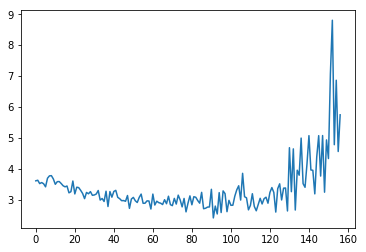

In [4]:
plt.plot(loss_array)

In [5]:
min(loss_array)

2.41

In [4]:
ssd_model.load_trained_model(config.trained_path)

In [5]:
optimizer = torch.optim.Adam(ssd_model.parameters())

In [6]:
prior_box = get_prior_box()
loss_array = []

for i, batch in enumerate(trn_dataloader):

    imgs, bboxes, labels = batch
    imgs = imgs.to(device)
    cls_preds, loc_preds = ssd_model(imgs)

    ssd_model.zero_grad()

    total_loss = 0
    total_loc_loss, total_cls_loss = 0, 0

    for idx in range(imgs.shape[0]):

        img, bbox, label = imgs[idx], bboxes[idx], labels[idx]
        cls_pred, loc_pred = cls_preds[idx], loc_preds[idx]
        iou = get_iou(bbox, prior_box)

        pos_mask, cls_target, bbox_target = get_target(iou, prior_box, img, bbox, label)
        pos_mask, cls_target, bbox_target = pos_mask.to(device), cls_target.to(device), bbox_target.to(device)

        loss_loc, loss_cls = loss(cls_pred, loc_pred, pos_mask, cls_target, bbox_target)
        total_loc_loss += loss_loc; total_cls_loss += loss_cls

        total_loss += loss_cls

    total_loss /= float(imgs.shape[0])
    total_cls_loss /= float(imgs.shape[0])
    total_loc_loss /= float(imgs.shape[0])

    total_loss.backward()

    optimizer.step()
    cls_loss = round(float(total_cls_loss), 3)
    loc_loss = round(float(total_loc_loss), 3)
    t_loss = round(float(total_loss), 3)

    print(i, 'cls_loss: {}, loc_loss: {}, loss: {}'.format(cls_loss, loc_loss, t_loss))
    loss_array.append(t_loss)

/home/kindeqi/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


0 cls_loss: 9.75, loc_loss: 6.921, loss: 9.75
1 cls_loss: 10.844, loc_loss: 5.979, loss: 10.844
2 cls_loss: 5.542, loc_loss: 8.049, loss: 5.542
3 cls_loss: 4.635, loc_loss: 6.594, loss: 4.635
4 cls_loss: 3.47, loc_loss: 7.149, loss: 3.47
5 cls_loss: 3.444, loc_loss: 5.886, loss: 3.444
6 cls_loss: 3.28, loc_loss: 6.612, loss: 3.28
7 cls_loss: 3.989, loc_loss: 5.878, loss: 3.989
8 cls_loss: 3.529, loc_loss: 7.656, loss: 3.529
9 cls_loss: 3.322, loc_loss: 6.576, loss: 3.322
10 cls_loss: 3.734, loc_loss: 7.213, loss: 3.734
11 cls_loss: 3.345, loc_loss: 7.204, loss: 3.345
12 cls_loss: 3.0, loc_loss: 6.589, loss: 3.0
13 cls_loss: 3.557, loc_loss: 8.754, loss: 3.557
14 cls_loss: 3.685, loc_loss: 6.91, loss: 3.685
15 cls_loss: 4.188, loc_loss: 8.668, loss: 4.188
16 cls_loss: 2.758, loc_loss: 5.577, loss: 2.758
17 cls_loss: 4.259, loc_loss: 7.196, loss: 4.259
18 cls_loss: 2.744, loc_loss: 6.569, loss: 2.744
19 cls_loss: 3.611, loc_loss: 8.595, loss: 3.611
20 cls_loss: 3.292, loc_loss: 8.414, lo

KeyboardInterrupt: 

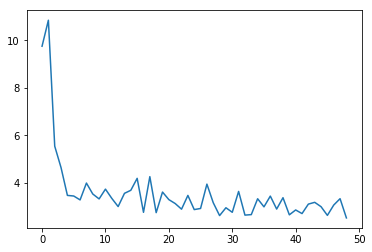

In [7]:
plt.plot(loss_array)

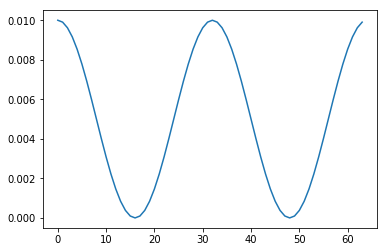

In [3]:
x = torch.randn(4, 4)
w = nn.Parameter(torch.randn(4, 3))
b = nn.Parameter(torch.randn(1, 3))
y = torch.randn(4, 3)

criterion = nn.SmoothL1Loss()
optimizer = torch.optim.SGD([w, b], lr=1e-2, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 16)

epoch, batch = 4, 16

lr_array = []

for j in range(epoch):
    for k in range(batch):
        pred = torch.matmul(x, w) + b
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        scheduler.step()
        lr_array.append(optimizer.param_groups[0]['lr'])

plt.plot(lr_array)

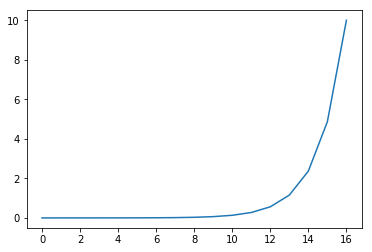

In [6]:
x = torch.randn(4, 4)
w = nn.Parameter(torch.randn(4, 3))
b = nn.Parameter(torch.randn(1, 3))
y = torch.randn(4, 3)

criterion = nn.SmoothL1Loss()
optimizer = torch.optim.SGD([w, b], lr=1e-2, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 16)

lr_change = []
lr_min, lr_max = 1e-4, 10
ratio = lr_max / lr_min

for t in range(batch + 1):
    optimizer.param_groups[0]['lr'] = lr_min * ratio ** (t / batch)
    lr_change.append(lr_min * ratio ** (t / batch))
#     print(optimizer.param_groups[0]['lr'])

plt.plot(lr_change)